In [4]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris

In [5]:
X, y = load_iris(return_X_y=True)
X.shape, y.shape

((150, 4), (150,))

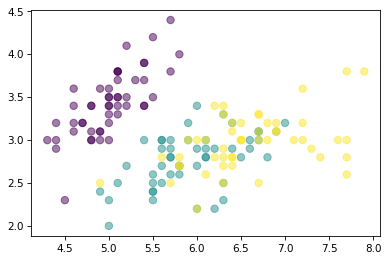

In [6]:
X = X[:, :2]
_ = plt.figure(dpi=75)
plt.scatter(X[:,0], X[:,1], s=50, c=y, alpha=0.5)
plt.show()

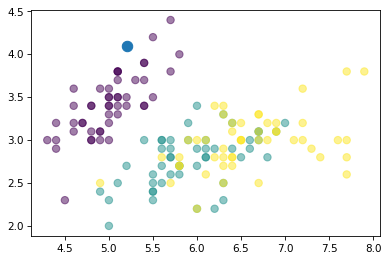

In [9]:
X0 = np.array([5.2, 4.1])
_ = plt.figure(dpi=75)
plt.scatter(X[:,0], X[:,1], s=50, c=y, alpha=0.5)
plt.scatter(X0[0], X0[1], s=100)
plt.show()

## Sample implementation for KNN classification

The code below illustrates the main concepts for building a kNN classifier

In [12]:
def euclidean_distance(x1, x2):
    return np.sqrt((x1[0] - x2[0])**2 + (x1[1] - x2[1])**2)

distances = []
for idx in range(len(y)):
    d = euclidean_distance(X0, X[idx])
    distances.append((d, y[idx]))

print(distances[0])
sorted_distances = sorted(distances, key=lambda x: x[0])

(0.6082762530298217, 0)


In [19]:
k = 100
neighbours = sorted_distances[:k]
neighbours

[(0.0, 0),
 (0.28284271247461895, 0),
 (0.28284271247461895, 0),
 (0.31622776601683794, 0),
 (0.31622776601683794, 0),
 (0.31622776601683794, 0),
 (0.31622776601683794, 0),
 (0.41231056256176546, 0),
 (0.4123105625617657, 0),
 (0.44721359549995754, 0),
 (0.53851648071345, 0),
 (0.5830951894845295, 0),
 (0.58309518948453, 0),
 (0.5830951894845304, 0),
 (0.5999999999999996, 0),
 (0.6082762530298216, 0),
 (0.6082762530298217, 0),
 (0.6082762530298217, 0),
 (0.6324555320336757, 0),
 (0.6324555320336757, 0),
 (0.6708203932499366, 0),
 (0.6999999999999997, 0),
 (0.7071067811865474, 0),
 (0.7280109889280516, 0),
 (0.7280109889280516, 0),
 (0.7280109889280516, 0),
 (0.7280109889280516, 0),
 (0.7810249675906655, 0),
 (0.8062257748298548, 0),
 (0.8062257748298549, 0),
 (0.8062257748298549, 0),
 (0.8246211251235319, 0),
 (0.9219544457292882, 0),
 (0.9219544457292889, 0),
 (1.0295630140986995, 0),
 (1.0295630140986995, 0),
 (1.0440306508910546, 0),
 (1.0440306508910546, 0),
 (1.0630145812734646, 1

In [32]:
def predict(neighbours):
    counts = {}
    for neighbour in neighbours:
        if counts.get(neighbour[1]):
            counts[neighbour[1]] += 1
        else:
            counts[neighbour[1]] = 1
    max_number_of_neighbours = np.max(list(counts.values()))
    for key, value in counts.items():
        if value == max_number_of_neighbours:
            return key

In [33]:
predict(neighbours)

0

In [40]:
def knn(k, X0, X, y):
    distances = []
    for idx in range(len(y)):
        d = euclidean_distance(X0, X[idx])
        distances.append((d, y[idx]))

    sorted_distances = sorted(distances, key=lambda x: x[0])
    neighbours = sorted_distances[:k]
    result = predict(neighbours)
    return result

In [41]:
X0 = []
for i in range(10):
    xi = [np.random.random(1)[0] * 7.5 + 3, np.random.random(1)[0] * 5 + 2]
    X0.append(xi)
X0

[[6.633572923280159, 5.765100697216482],
 [7.949515761816482, 2.869177872297675],
 [9.470774139875617, 4.615756201330454],
 [9.698630272938257, 2.648745875527275],
 [3.9791641819282897, 5.012107949082914],
 [6.251639248448695, 3.0665599103179435],
 [6.2680016351089245, 6.927087426857625],
 [6.455352452147213, 4.02795115249407],
 [7.865649375681578, 2.36331559402175],
 [8.960648112996681, 3.0058826419040385]]

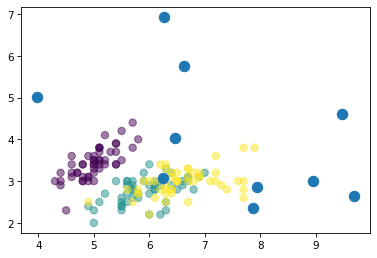

In [42]:
X0 = np.array(X0)
_ = plt.figure(dpi=75)
plt.scatter(X[:,0], X[:,1], s=50, c=y, alpha=0.5)
plt.scatter(X0[:, 0], X0[:, 1], s=100)
plt.show()

In [44]:
y_pred = []
for i in range(len(X0)):
    yi = knn(5, X0[i], X, y)
    y_pred.append(yi)

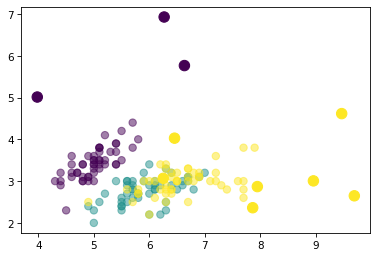

In [45]:
_ = plt.figure(dpi=75)
plt.scatter(X[:,0], X[:,1], s=50, c=y, alpha=0.5)
plt.scatter(X0[:, 0], X0[:, 1], c=y_pred, s=100)
plt.show()